In [10]:
#!pip install yfinance
import yfinance as yf
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

### Download Stock Market Data using Yahoo Finance

[*********************100%***********************]  1 of 1 completed


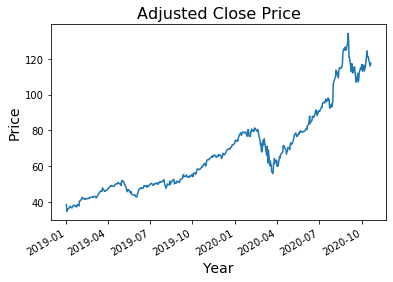

In [7]:
# Get the data of the stock AAPL
aapl = yf.download('AAPL','2019-01-01','2020-10-21')
#aapl.head()
# Plot the close price of the AAPL
aapl['Adj Close'].plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

In [8]:
#aapl.info()
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.875229,164101200


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


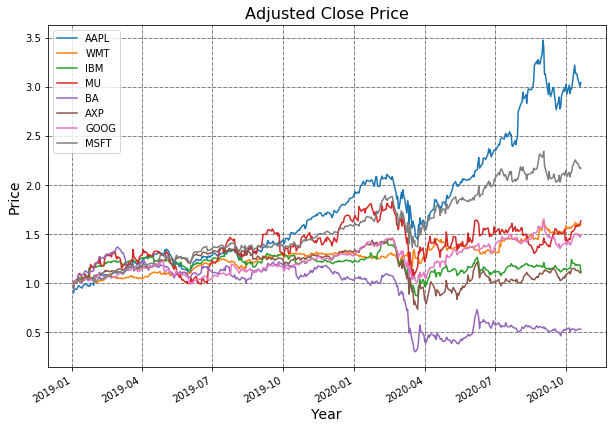

In [12]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP','GOOG','MSFT']

stock_data = pd.DataFrame(columns=tickers_list)
# Fetch the data

for ticker in tickers_list:
    stock_data[ticker] = yf.download(ticker, '2019-1-1', '2020-10-21')['Adj Close']
# Print first 5 rows of the data
#stock_data.head()


# Plot all the close prices
# the cumulative returns for individual stocks
((stock_data.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()



In [13]:
msft_daily_returns = stock_data['MSFT'].pct_change()

In [14]:
msft_daily_returns

Date
2019-01-02         NaN
2019-01-03   -0.036788
2019-01-04    0.046509
2019-01-07    0.001275
2019-01-08    0.007251
                ...   
2020-10-14   -0.008974
2020-10-15   -0.005433
2020-10-16    0.000000
2020-10-19   -0.024766
2020-10-20    0.002007
Name: MSFT, Length: 455, dtype: float64

In [26]:
msft_monthly_returns = stock_data['MSFT'].resample('M').ffill().pct_change()

In [27]:
##stock_data['MSFT']['2019-01':'2019-12'].pct_change()

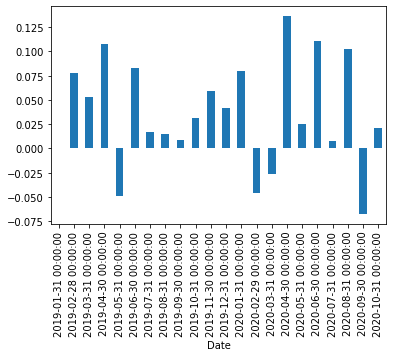

In [30]:
## default is line plot .. you can change it via 'kind'
msft_monthly_returns.plot(kind='bar')

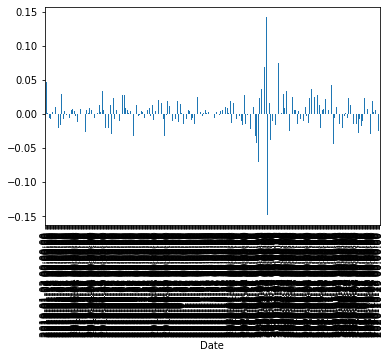

In [31]:
msft_daily_returns.plot(kind='bar')

In [32]:
msft_cumulative_returns = (msft_daily_returns + 1).cumprod()

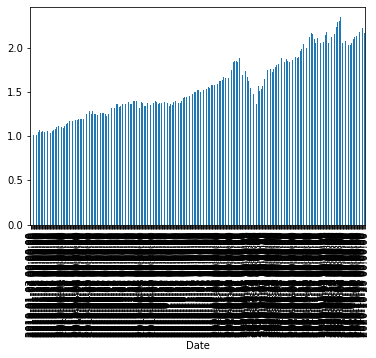

In [34]:
msft_cumulative_returns.plot(kind='bar')

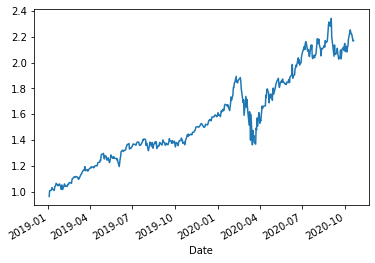

In [35]:
msft_cumulative_returns.plot()

In [39]:
bike_rental = pd.read_csv('/Users/csstnns/Desktop/Python Data Course - Oct2020/Day 3/bike_rental_dataset.csv',
                         index_col = 0,
                          parse_dates=['datetime']
                         )

In [45]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [43]:
## create your own datetime samples (instances)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html 
mydatetime = pd.date_range(start='1/1/2018', periods=5, freq='s')

In [47]:
bike_rental['2011-01-01 00:00:00':'2011-01-01 04:00:00']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
bike_rental['year'] = bike_rental.index.year
bike_rental['month'] = bike_rental.index.month
bike_rental['day'] = bike_rental.index.day
bike_rental['day_of_week'] = bike_rental.index.dayofweek
bike_rental['hour'] = bike_rental.index.hour


In [61]:
bike_rental.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_of_week,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


## Mapping numeric values of a column to categorical values

In [58]:
## a maping of day numbers to day names
my_maps = {
    0:'Monday', 
    1:'Tuesday', 
    2:'Wednesday', 
    3:'Thursday', 
    4:'Friday', 
    5:'Saturday', 
    6:'Sunday'
}

In [60]:
bike_rental['day_of_week'] = bike_rental['day_of_week'].map(my_maps)

In [64]:
#bike_rental.index.dt.day_name

In [65]:
bike_rental['date'] = bike_rental.index

In [67]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       10886 non-null  int64         
 1   holiday      10886 non-null  int64         
 2   workingday   10886 non-null  int64         
 3   weather      10886 non-null  int64         
 4   temp         10886 non-null  float64       
 5   atemp        10886 non-null  float64       
 6   humidity     10886 non-null  int64         
 7   windspeed    10886 non-null  float64       
 8   casual       10886 non-null  int64         
 9   registered   10886 non-null  int64         
 10  count        10886 non-null  int64         
 11  year         10886 non-null  int64         
 12  month        10886 non-null  int64         
 13  day          10886 non-null  int64         
 14  day_of_week  10886 non-null  object        
 15  hour         10886

In [71]:
bike_rental['date'].dt.day_name()

datetime
2011-01-01 00:00:00     Saturday
2011-01-01 01:00:00     Saturday
2011-01-01 02:00:00     Saturday
2011-01-01 03:00:00     Saturday
2011-01-01 04:00:00     Saturday
                         ...    
2012-12-19 19:00:00    Wednesday
2012-12-19 20:00:00    Wednesday
2012-12-19 21:00:00    Wednesday
2012-12-19 22:00:00    Wednesday
2012-12-19 23:00:00    Wednesday
Name: date, Length: 10886, dtype: object

In [72]:
bike_rental

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_of_week,hour,date
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Saturday,0,2011-01-01 00:00:00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday,1,2011-01-01 01:00:00
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Saturday,2,2011-01-01 02:00:00
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Saturday,3,2011-01-01 03:00:00
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Saturday,4,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wednesday,19,2012-12-19 19:00:00
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,Wednesday,20,2012-12-19 20:00:00
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,Wednesday,21,2012-12-19 21:00:00


In [74]:
bike_rental['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [75]:
yearly_hourly_group = bike_rental.groupby(['year','hour'])

In [87]:
yearly_hourly_group_mean = yearly_hourly_group['count'].mean()

In [88]:
yearly_hourly_group_mean

year  hour
2011  0        43.563877
      1        26.831858
      2        19.307692
      3        10.056872
      4         5.255814
      5        14.517857
      6        57.519824
      7       157.110132
      8       264.973568
      9       164.488987
      10      131.867841
      11      156.577093
      12      192.188596
      13      191.991228
      14      182.486842
      15      187.701754
      16      236.907895
      17      353.855263
      18      322.043860
      19      236.017544
      20      173.324561
      21      134.118421
      22      103.833333
      23       69.605263
2012  0        66.662281
      1        40.824561
      2        26.396476
      3        13.373874
      4         7.497797
      5        24.925439
      6        94.916667
      7       268.877193
      8       460.135965
      9       278.820175
      10      218.127193
      11      264.535088
      12      320.828947
      13      323.583333
      14      304.399123
      15      

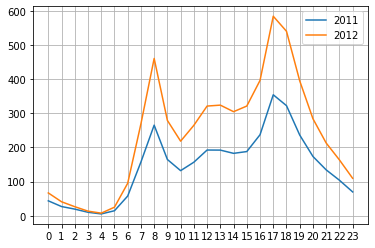

In [98]:
for year in yearly_hourly_group_mean.index.levels[0]:
    #print(yearly_hourly_group_mean[year].index)
    #print(yearly_hourly_group_mean[year])
    plt.plot(yearly_hourly_group_mean[year].index, yearly_hourly_group_mean[year], label=year)

plt.legend()
## try with and without the semi-colon
## semi-colon separates python instructions 
## this one is saying there is an empty instruction after the ;
## this will suppress the output of xticks
plt.xticks(yearly_hourly_group_mean[year].index);
plt.grid()
plt.show()

In [85]:
yearly_hourly_group_mean.index.levels[0]

Int64Index([2011, 2012], dtype='int64', name='year')

hour
0      43.563877
1      26.831858
2      19.307692
3      10.056872
4       5.255814
5      14.517857
6      57.519824
7     157.110132
8     264.973568
9     164.488987
10    131.867841
11    156.577093
12    192.188596
13    191.991228
14    182.486842
15    187.701754
16    236.907895
17    353.855263
18    322.043860
19    236.017544
20    173.324561
21    134.118421
22    103.833333
23     69.605263
Name: count, dtype: float64